In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic air quality data (PM2.5, NO2, CO, AQI)

In [2]:
def generate_air_data(size=500):
    t = np.linspace(0, 50, size)
    pm25 = 50 + 10 * np.sin(0.3 * t) + np.random.normal(0, 5, size)
    no2 = 30 + 5 * np.cos(0.2 * t) + np.random.normal(0, 3, size)
    co = 1 + 0.2 * np.sin(0.1 * t) + np.random.normal(0, 0.1, size)
    aqi = 0.5 * pm25 + 0.3 * no2 + 20 * co + np.random.normal(0, 2, size)
    return np.stack([pm25, no2, co, aqi], axis=1).astype(np.float32)
 
data = generate_air_data()

# Normalize features

In [3]:
mean = data.mean(axis=0)
std = data.std(axis=0)
data = (data - mean) / std

# Create sequences (past 24 steps → next AQI)

In [4]:
def create_dataset(data, window=24, target_index=3):
    X, y = [], []
    for i in range(len(data) - window):
        X.append(data[i:i+window])
        y.append(data[i+window, target_index])
    return np.array(X), np.array(y)
 
X, y = create_dataset(data, window=24, target_index=3)

# Split dataset

In [5]:
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Build LSTM model

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(24, X.shape[2])),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(1)
])

# Compile and train

In [7]:
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.5220 - val_loss: 0.7058
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.4405 - val_loss: 0.6799
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.4173 - val_loss: 0.6615
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.4334 - val_loss: 0.6556
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.4094 - val_loss: 0.7037
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.4077 - val_loss: 0.7086
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.4258 - val_loss: 0.7252
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.4118 - val_loss: 0.7182
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.4215 - val_loss: 0.7658
Epoch 10/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.3731 - val_loss: 0.7771


# Predict and plot

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step 


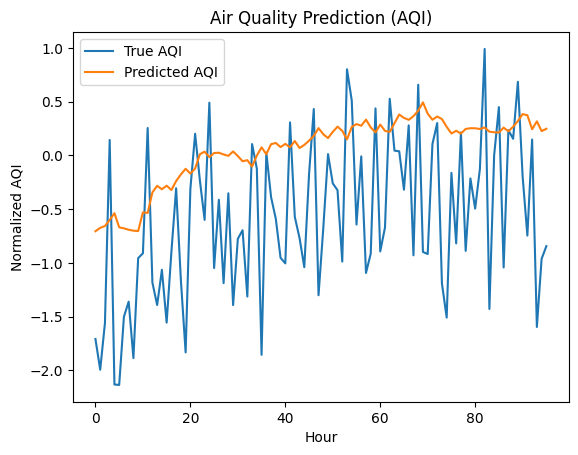

In [8]:
preds = model.predict(X_test[:100]).flatten()
plt.plot(y_test[:100], label='True AQI')
plt.plot(preds, label='Predicted AQI')
plt.title("Air Quality Prediction (AQI)")
plt.xlabel("Hour")
plt.ylabel("Normalized AQI")
plt.legend()
plt.show()